In [1]:
# automatically reload edited modules
%load_ext autoreload
%autoreload 2
import tensorflow as tf
from copy import  deepcopy
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython import display
import os
#os.chdir('/home/yash/Documents/EWC/Elastic-Weight-Consolidation')
from model import Model
import pdb

/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

In [2]:
os.chdir('/root/awid_dataset/')
import pandas as pd
# Read in the CSV files
dataset_columns = ['frame.interface_id',	'frame.dlt',	'frame.offset_shift',	'frame.time_epoch',	'frame.time_delta',	'frame.time_delta_displayed',	'frame.time_relative',	'frame.len',	'frame.cap_len',	'frame.marked',	'frame.ignored',	'radiotap.version',	'radiotap.pad',	'radiotap.length',	'radiotap.present.tsft',	'radiotap.present.flags',	'radiotap.present.rate',	'radiotap.present.channel',	'radiotap.present.fhss',	'radiotap.present.dbm_antsignal',	'radiotap.present.dbm_antnoise',	'radiotap.present.lock_quality',	'radiotap.present.tx_attenuation',	'radiotap.present.db_tx_attenuation',	'radiotap.present.dbm_tx_power',	'radiotap.present.antenna',	'radiotap.present.db_antsignal',	'radiotap.present.db_antnoise',	'radiotap.present.rxflags',	'radiotap.present.xchannel',	'radiotap.present.mcs',	'radiotap.present.ampdu',	'radiotap.present.vht',	'radiotap.present.reserved',	'radiotap.present.rtap_ns',	'radiotap.present.vendor_ns',	'radiotap.present.ext',	'radiotap.mactime',	'radiotap.flags.cfp',	'radiotap.flags.preamble',	'radiotap.flags.wep',	'radiotap.flags.frag',	'radiotap.flags.fcs',	'radiotap.flags.datapad',	'radiotap.flags.badfcs',	'radiotap.flags.shortgi',	'radiotap.datarate',	'radiotap.channel.freq',	'radiotap.channel.type.turbo',	'radiotap.channel.type.cck',	'radiotap.channel.type.ofdm',	'radiotap.channel.type.2ghz',	'radiotap.channel.type.5ghz',	'radiotap.channel.type.passive',	'radiotap.channel.type.dynamic',	'radiotap.channel.type.gfsk',	'radiotap.channel.type.gsm',	'radiotap.channel.type.sturbo',	'radiotap.channel.type.half',	'radiotap.channel.type.quarter',	'radiotap.dbm_antsignal',	'radiotap.antenna',	'radiotap.rxflags.badplcp',	'wlan.fc.type_subtype',	'wlan.fc.version',	'wlan.fc.type',	'wlan.fc.subtype',	'wlan.fc.ds',	'wlan.fc.frag',	'wlan.fc.retry',	'wlan.fc.pwrmgt',	'wlan.fc.moredata',	'wlan.fc.protected',	'wlan.fc.order',	'wlan.duration',	'wlan.ra',	'wlan.da',	'wlan.ta',	'wlan.sa',	'wlan.bssid',	'wlan.frag',	'wlan.seq',	'wlan.bar.type',	'wlan.ba.control.ackpolicy',	'wlan.ba.control.multitid',	'wlan.ba.control.cbitmap',	'wlan.bar.compressed.tidinfo',	'wlan.ba.bm',	'wlan.fcs_good',	'wlan_mgt.fixed.capabilities.ess',	'wlan_mgt.fixed.capabilities.ibss',	'wlan_mgt.fixed.capabilities.cfpoll.ap',	'wlan_mgt.fixed.capabilities.privacy',	'wlan_mgt.fixed.capabilities.preamble',	'wlan_mgt.fixed.capabilities.pbcc',	'wlan_mgt.fixed.capabilities.agility',	'wlan_mgt.fixed.capabilities.spec_man',	'wlan_mgt.fixed.capabilities.short_slot_time',	'wlan_mgt.fixed.capabilities.apsd',	'wlan_mgt.fixed.capabilities.radio_measurement',	'wlan_mgt.fixed.capabilities.dsss_ofdm',	'wlan_mgt.fixed.capabilities.del_blk_ack',	'wlan_mgt.fixed.capabilities.imm_blk_ack',	'wlan_mgt.fixed.listen_ival',	'wlan_mgt.fixed.current_ap',	'wlan_mgt.fixed.status_code',	'wlan_mgt.fixed.timestamp',	'wlan_mgt.fixed.beacon',	'wlan_mgt.fixed.aid',	'wlan_mgt.fixed.reason_code',	'wlan_mgt.fixed.auth.alg',	'wlan_mgt.fixed.auth_seq',	'wlan_mgt.fixed.category_code',	'wlan_mgt.fixed.htact',	'wlan_mgt.fixed.chanwidth',	'wlan_mgt.fixed.fragment',	'wlan_mgt.fixed.sequence',	'wlan_mgt.tagged.all',	'wlan_mgt.ssid',	'wlan_mgt.ds.current_channel',	'wlan_mgt.tim.dtim_count',	'wlan_mgt.tim.dtim_period',	'wlan_mgt.tim.bmapctl.multicast',	'wlan_mgt.tim.bmapctl.offset',	'wlan_mgt.country_info.environment',	'wlan_mgt.rsn.version',	'wlan_mgt.rsn.gcs.type',	'wlan_mgt.rsn.pcs.count',	'wlan_mgt.rsn.akms.count',	'wlan_mgt.rsn.akms.type',	'wlan_mgt.rsn.capabilities.preauth',	'wlan_mgt.rsn.capabilities.no_pairwise',	'wlan_mgt.rsn.capabilities.ptksa_replay_counter',	'wlan_mgt.rsn.capabilities.gtksa_replay_counter',	'wlan_mgt.rsn.capabilities.mfpr',	'wlan_mgt.rsn.capabilities.mfpc',	'wlan_mgt.rsn.capabilities.peerkey',	'wlan_mgt.tcprep.trsmt_pow',	'wlan_mgt.tcprep.link_mrg',	'wlan.wep.iv',	'wlan.wep.key',	'wlan.wep.icv',	'wlan.tkip.extiv',	'wlan.ccmp.extiv',	'wlan.qos.tid',	'wlan.qos.priority',	'wlan.qos.eosp',	'wlan.qos.ack',	'wlan.qos.amsdupresent',	'wlan.qos.buf_state_indicated',	'wlan.qos.bit4',	'wlan.qos.txop_dur_req',	'wlan.qos.buf_state_indicated',	'data.len',	'class']

print("Reading training csv file.")
df1 = pd.read_csv('awid_train_set')
df1.columns = dataset_columns
#Fllling the entries "?" with "0"
df1=df1.replace('?',0)

df1.drop([dataset_columns[i] for i in [33, 63, 67, 75, 76, 77, 78, 79, 82, 86, 87, 91, 103, 104, 105, 106, 108, 109, 111, 113, 114,118, 123, 124, 132, 133, 139,  141, 142, 143, 147 ]], axis=1, inplace=True) 

print("Reading testing csv file.")
df2 = pd.read_csv('awid_test_set')
df2.columns = dataset_columns
#Fllling the entries "?" with "0"
df2=df2.replace('?',0)

df2.drop([dataset_columns[i] for i in [33, 63, 67, 75, 76, 77, 78, 79, 82, 86, 87, 91, 103, 104, 105, 106, 108, 109, 111, 113, 114,118, 123, 124, 132, 133, 139,  141, 142, 143, 147 ]], axis=1, inplace=True)  

df = pd.concat([df1, df2])
print(len(df),len(df1),len(df2),len(df1)+len(df2))

print (len(df['class'].unique()),df['class'].unique(),len(df.columns))
os.chdir('/root/Elastic-Weight-Consolidation-task-continual/AWID-EWC/')
obj_df = df.loc[:, (df != 0).any(axis=0)]

y = obj_df["class"]
#obj_df=pd.get_dummies(obj_df, columns=["class"])

x = obj_df.values[:,:-1]  #It has 17 labels 

Reading training csv file.


/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (37,38,39,40,41,42,43,44,45,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,74,88) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Reading testing csv file.
2371216 575642 1795574 2371216
17 ['normal' 'fragmentation' 'arp' 'probe_request' 'chop_chop' 'rts'
 'deauthentication' 'amok' 'beacon' 'evil_twin' 'cafe_latte' 'cts' 'hirte'
 'power_saving' 'disassociation' 'authentication_request' 'probe_response'] 124


In [3]:
#Counting the number of records in each class
for label in df['class'].unique():
    print(label + ':' + str(y.tolist().count(label)))

normal:2163973
fragmentation:937
arp:78253
probe_request:369
chop_chop:2871
rts:199
deauthentication:14892
amok:31657
beacon:2398
evil_twin:3244
cafe_latte:46268
cts:1759
hirte:19089
power_saving:165
disassociation:84
authentication_request:3500
probe_response:1558


In [4]:
#since these classes have very large samples, randomly sample some records to make labels balanced.
from more_itertools import locate
sample_size = 10000
Yss = {}
length = 0
for label in df['class'].unique().tolist():
    if y.tolist().count(label) > sample_size:
        sample_inds = np.random.randint(0, y.tolist().count(label), sample_size )
        all_inds =  list(locate(y, lambda a: a == label))
        Yss[label] = np.array(all_inds)[sample_inds]
    else:
        Yss[label] = list(locate(y, lambda a: a == label))
    print(label, len(Yss[label]))  
    length = length + len(Yss[label])
print('size of dataset:{}'.format(length))

normal 10000
fragmentation 937
arp 10000
probe_request 369
chop_chop 2871
rts 199
deauthentication 10000
amok 10000
beacon 2398
evil_twin 3244
cafe_latte 10000
cts 1759
hirte 10000
power_saving 165
disassociation 84
authentication_request 3500
probe_response 1558
size of dataset:77084


In [5]:
#Recreating X and Y by subsampling the class with large records
from itertools import chain
inds = list(chain.from_iterable(Yss.values()))
X=x[inds]
cleanup_nums = {"normal":0, "fragmentation":1, "arp":2, "probe_request":3, "chop_chop":4, "rts":5, "deauthentication":6, "amok":7, "beacon":8, "evil_twin":9, "cafe_latte":10, "cts":11, "hirte":12, "power_saving":13, "disassociation":14, "authentication_request":15, "probe_response":16}
y.replace(cleanup_nums,inplace=True)
Y_all_attacks = y.values[inds]
print (X.shape, Y_all_attacks.shape)

(77084, 98) (77084,)


/usr/local/lib/python3.5/dist-packages/pandas/core/generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [6]:
print("Datasetset Formatting")

for j in range(0,X.shape[1]):
    maximum = max([float(k) for k in X[:,j]]) if  max([float(k) for k in X[:,j]]) != 0 else 1
    print(j)
    for i in range(0,len(X)):
        X[i,j] = round(float(X[i,j])/maximum,3)

Datasetset Formatting
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train_all_attacks, Y_test_all_attacks = train_test_split(X, Y_all_attacks, test_size=0.33)
print (X_train.shape, Y_train_all_attacks.shape)
print(X_test.shape, Y_test_all_attacks.shape)

(51646, 98) (51646,)
(25438, 98) (25438,)


In [8]:
import pickle
with open('AWID.pickle', 'wb') as f:
    pickle.dump(X_train, f)
    pickle.dump(X_test, f)
    pickle.dump(Y_train_all_attacks, f)
    pickle.dump(Y_test_all_attacks, f)

In [8]:
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)
sess = tf.InteractiveSession()

# define input and target placeholders
x = tf.placeholder(tf.float32, shape=[None, 98])
y_ = tf.placeholder(tf.float32, shape=[None, 17])
task_cl_lab = tf.placeholder(tf.int32, shape=[2])

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [9]:
print(X_train.shape, X_test.shape, Y_train_all_attacks.shape, Y_test_all_attacks.shape)

from keras.utils import np_utils

#task_labels = [[0,1], [2,3], [4,5], [6,7], [8,9],[1,5],[7,9],[3,8],[0,6],[4,2]]
#task_labels = [[4,2], [0,6], [3,8], [9,7], [1,5],[8,9],[6,7],[5,5],[3,2],[0,1]]
task_labels = [[14,15],[2,3],[4,5],[6,7],[8,9],[10,11],[12,13],[0,1],[16,0]]
#task_labels = [[0,9], [7,8], [3,6], [1,4], [2,5]]
#task_labels = [[4,5,6], [1,2,3], [7,8,9], [10,11,12], [13,14,15]]
n_tasks = len(task_labels)
nb_classes  = 17
training_datasets = []
validation_datasets = []
multihead=False

for labels in task_labels:
    idx = np.in1d(Y_train_all_attacks, labels)
    if multihead:
        label_map = np.arange(nb_classes)
        label_map[labels] = np.arange(len(labels))
        data = X_train[idx], np_utils.to_categorical(label_map[Y_train_all_attacks[idx]], len(labels))
    else:
        data = X_train[idx], np_utils.to_categorical(Y_train_all_attacks[idx], nb_classes)
        training_datasets.append(data)

for labels in task_labels:
    idx = np.in1d(Y_test_all_attacks, labels)
    if multihead:
        label_map = np.arange(nb_classes)
        label_map[labels] = np.arange(len(labels))
        data = X_test[idx], np_utils.to_categorical(label_map[Y_test_all_attacks[idx]], len(labels))
    else:
        data = X_test[idx], np_utils.to_categorical(Y_test_all_attacks[idx], nb_classes)
        validation_datasets.append(data)
        
tasks_train={}; labels_train = {}; tasks_test = {}; labels_test = {}

for i in range(len(task_labels)):
    tasks_train[str(i)] = training_datasets[i][0]
    labels_train[str(i)] = training_datasets[i][1]
    tasks_test[str(i)] = validation_datasets[i][0]
    labels_test[str(i)] = validation_datasets[i][1]
    print('Task {0} size: Trainset - {1}, {2}, Testset - {3}, {4}'.format(i,tasks_train[str(i)].shape, labels_train[str(i)].shape, tasks_test[str(i)].shape, labels_test[str(i)].shape))

(51646, 98) (25438, 98) (51646,) (25438,)
Task 0 size: Trainset - (2383, 98), (2383, 17), Testset - (1201, 98), (1201, 17)
Task 1 size: Trainset - (6918, 98), (6918, 17), Testset - (3451, 98), (3451, 17)
Task 2 size: Trainset - (2085, 98), (2085, 17), Testset - (985, 98), (985, 17)
Task 3 size: Trainset - (13455, 98), (13455, 17), Testset - (6545, 98), (6545, 17)
Task 4 size: Trainset - (3799, 98), (3799, 17), Testset - (1843, 98), (1843, 17)
Task 5 size: Trainset - (7882, 98), (7882, 17), Testset - (3877, 98), (3877, 17)
Task 6 size: Trainset - (6802, 98), (6802, 17), Testset - (3363, 98), (3363, 17)
Task 7 size: Trainset - (7267, 98), (7267, 17), Testset - (3670, 98), (3670, 17)
Task 8 size: Trainset - (7677, 98), (7677, 17), Testset - (3881, 98), (3881, 17)


Using TensorFlow backend.


In [10]:
def mnist_imshow(img):
    plt.imshow(img.reshape([28, 28]), cmap='gray')
    plt.axis('off')

# return a new mnist dataset w/ pixels randomly permuted
def permute_mnist(mnist):
    perm_inds = list(range(mnist.train.images.shape[1]))
#     print (range(mnist.train.images.shape[1]))
    np.random.shuffle(perm_inds)
    mnist2 = deepcopy(mnist)
    sets = ["train", "validation", "test"]
    for set_name in sets:
        this_set = getattr(mnist2, set_name) # shallow copy
#         print (np.array([this_set.images[:,i] for i in [1,2,3,4]]).shape)
        #dafaq is with ._images, where did this shit come from, but okay moving on with lyf 
        this_set._images = np.transpose(np.array([this_set.images[:,c] for c in perm_inds]))
    return mnist2

def plot_test_acc(plot_handles, first_task):
    #plt.legend(handles=plot_handles, loc="center right")
    if first_task == 0:
        plt.legend(handles=plot_handles, loc='upper right',prop={'size': 10}, bbox_to_anchor=(1.05, -0.25), ncol=3)
    plt.xlabel("Iterations")
    plt.ylabel("Test Accuracy")
    plt.ylim(0, 1.1)
    display.display(plt.gcf())
    display.clear_output(wait=True)

#manupulated the validation code: validation task by task        
def split_padded(a,n):
    padding = (-len(a))%n
    return np.split(np.concatenate((a,np.zeros(padding))),n)

def train_model(model, train_set, test_sets, num_iters=1000, disp_freq=50, lams=[0]):
    Fisher_inf_history=[]
    Linear_Fisher_history=[]
    Params = []
    Parm_grads = []
    loss_save = []
    surrogate_loss_save = []
    for l in range(len(lams)):
        '''
        if lams[l] == 0:
            model.vanilla_loss()
        else:
            model.set_ewc_loss(lams[l])
        '''
        model.vanilla_loss()
        
        test_accs = []
        for i in range(len(tasks_test)):
            test_accs.append(np.zeros(int(num_iters / disp_freq)))
        
        save_accs = {}
        for continual_task in range(len(task_labels)):
            for task in range(len(tasks_test)):
                save_accs[str(continual_task)+str(task)] = []
            
        colors = ['r', 'b', 'g', 'y','k', 'm', 'c', 'r.', 'g.', 'b.']
        for continual_task in range(len(task_labels)):
            model.restore(sess)
            #train_batch = train_set.train.next_batch(100)
            #feed_dict = {x: train_batch[0], y_: train_batch[1]}  
            sample_inds = np.arange(len(tasks_train[str(continual_task)]))
            #batch_ids = split_padded(sample_inds,num_iters)  #Equal sized minibatches run for 1 iteration.
            batch_ids = [sample_inds] * num_iters #All samples fed and run for num_iters iterations.
            for it in range(num_iters-1):
                x_minibatches = tasks_train[str(continual_task)][batch_ids[it].astype(int),:]
                y_minibatches = labels_train[str(continual_task)][batch_ids[it].astype(int),:]
                
                feed_dict={x:x_minibatches, y_:y_minibatches, task_cl_lab:task_labels[continual_task]}
                model.train_step.run(feed_dict=feed_dict)
                
            
                if it%disp_freq == 0:
                    plt.subplot(1, len(task_labels), continual_task+1)
                    plots = []

                    for task in range(len(tasks_test)):
                        index = int(it/disp_freq)
                        #feed_dict = {x: test_sets[task].test.images, y_:test_sets[task].test.labels}
                        feed_dict = {x:tasks_test[str(task)], y_:labels_test[str(task)], task_cl_lab:task_labels[task]}
                        computed_acc = model.accuracy.eval(feed_dict=feed_dict)
                        test_accs[task][index] = computed_acc
                        save_accs[str(continual_task)+str(task)].append(computed_acc)
                        task_char = chr(ord('A') +task)
                        plot_h, = plt.plot(range(1, it+2, disp_freq), test_accs[task][:index+1], colors[task], label = "Task" + task_char)
                        plots.append(plot_h)
                        
                    plot_test_acc(plots, continual_task)

                    if lams[l] == 0:
                        plt.title("Vanilla SGD")
                    else:
                        task_countr = chr(ord('A')+continual_task)
                        plt.title("EWC: Task-"+task_countr)

                    plt.gcf().set_size_inches(15, 3.5)
                    plt.subplots_adjust(wspace = 0.4)
                    
                    if test_accs[continual_task][index] > 0.95: #Prevent model from overfitting. if accuracy is more than 90%, no need to further train.
                        break
                    
            
            model.task = task_labels[continual_task]
            loss_save.append(model.cross_entropy.eval(feed_dict={x:x_minibatches, y_:y_minibatches, task_cl_lab:task_labels[continual_task]}))
            parm_grads = sess.run(model.parm_grads, feed_dict={x: tasks_train[str(continual_task)], y_:labels_train[str(continual_task)], task_cl_lab:task_labels[continual_task]})
            Parm_grads.append(parm_grads)
            if lams[l] != 0:
                fisher_inf,linear_fisher,params = model.compute_fisher(tasks_test[str(continual_task)], sess, num_samples=100, plot_diffs=False)                
                Fisher_inf_history.append(fisher_inf)
                Linear_Fisher_history.append(linear_fisher)
                Params.append(params)
                #if continual_task == 0:
                model.star()
                model.set_ewc_loss(lams[l])
                model.task = task_labels[continual_task]
                surrogate_loss_save.append(model.ewc_loss.eval(feed_dict={x:x_minibatches, y_:y_minibatches, task_cl_lab:task_labels[continual_task]}))
    surrogate_loss_save[0] = 0
    return(Fisher_inf_history, Linear_Fisher_history,Params,Parm_grads,save_accs,loss_save,surrogate_loss_save)

In [11]:
# instantiate new model
model = Model(x, y_, task_cl_lab) # simple 2-layer network
sess.run(tf.global_variables_initializer())

Instructions for updating:
Colocations handled automatically by placer.


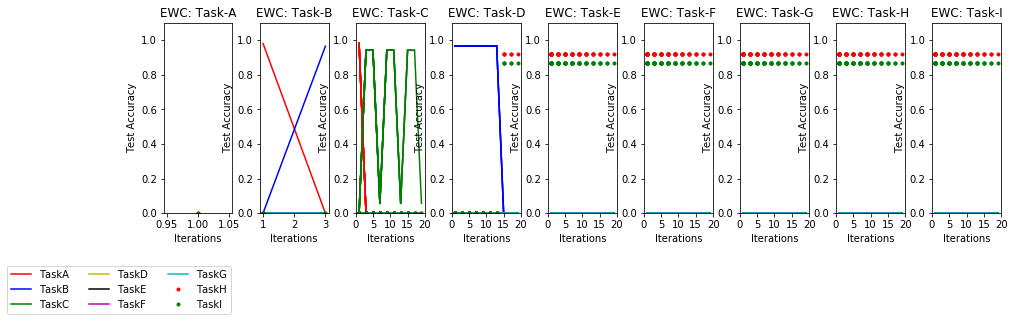

In [12]:
mnist2 = permute_mnist(mnist) # get second mnist
Fisher_inf_history,Linear_Fisher_history,Params,Parm_grads,save_accs,loss_after_task,surrogate_loss_after_task = train_model(model, mnist2, [mnist, mnist2], 20, 2, [5]) # train on task-B 

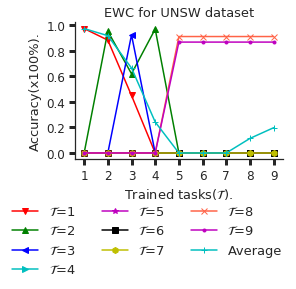

In [18]:
from matplotlib import *
import sys
from pylab import *
import matplotlib.colors as colors
import matplotlib.cm as cmx
import seaborn as sns
sns.set_style("ticks")
os.chdir('/root/Elastic-Weight-Consolidation-task-continual/AWID-EWC/')
plot_array=np.zeros((len(tasks_test),len(tasks_test)))
for continual_task in range(len(task_labels)):
    for task in range(len(tasks_test)):
        plot_array[continual_task][task] = save_accs[str(continual_task)+str(task)][-1]
        
#print(plot_array)
'''
plot_array = np.array(array([[0.9738676 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.88327527, 0.95289963, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.45        , 0.62        , 0.92441267, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.9699735 , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.91150683, 0.86798853],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.91150683, 0.86798853],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.91150683, 0.86798853],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.91150683, 0.86798853],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.91150683, 0.86798853]]))
'''
figure(figsize=(4, 4.5))
axs = [subplot(1,1,1)]#, None, None]
fontsize = 13

colorVal = ['r','g','b','c','m','k','y','tomato','m','c']
marker=["v","^","<",">","*","s","h","x",".","+"]

mean_stuff=[]
for i in range(len(plot_array)):
    mean_stuff.append(plot_array[i][:i+1].mean())
    

for j in range(len(tasks_test)):
    label = "$\mathcal{T}$=%g"%(j+1)
    axs[0].plot(range(1,len(tasks_test)+1), plot_array[:, j], marker=marker[j], c=colorVal[j], label=label)
axs[0].plot(range(1,len(tasks_test)+1), mean_stuff, marker=marker[j+1], c=colorVal[j+1], label='Average')
axs[0].legend(loc='upper right',prop={'size': fontsize}, bbox_to_anchor=(1.05, -0.25), ncol=3)
axs[0].set_xlabel("Trained tasks($\mathcal{T}$).",fontsize=fontsize)
axs[0].set_ylabel('Accuracy(x100%).',fontsize=fontsize)
axs[0].set_xticks(range(1,len(tasks_test)+1))
axs[0].set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
axs[0].tick_params(labelsize='large', width=3)
axs[0].set_title('EWC for UNSW dataset', fontsize=fontsize)

gcf().tight_layout()
sns.despine()
plt.savefig('AWID_EWC.pdf')

In [19]:
#Inspection of behavior of importance parameter Fisher after every task 
print('Fisher (parameter importance value) profile change')
from numpy import count_nonzero
old_diag_fisher_list = [0] * len(Linear_Fisher_history[0])
def flat_list(fisher_inf):
    def flatten(x):
        try:
            it = iter(x)
        except TypeError:
            yield x
        else:
            for i in it:
                for j in flatten(i):
                    yield j

    diag_fisher_list = []               
    for i in range(len(fisher_inf)):
        diag_fisher_list.append(list(flatten(fisher_inf[i]))) 
    diag_fisher_list = list(flatten(diag_fisher_list))
    return diag_fisher_list

non_zero_imp_param = [] 
for j in range(len(Fisher_inf_history)):
    diag_fisher_list = flat_list(Fisher_inf_history[j])
    non_zero_count = count_nonzero(diag_fisher_list)
    non_zero_imp_param.append(non_zero_count)
    print('Task {0}. # of non-zero diagonal elements = {1}. Total diagonal elements = {2}'.format(j,non_zero_count, len(diag_fisher_list)))

Fisher (parameter importance value) profile change
Task 0. # of non-zero diagonal elements = 257. Total diagonal elements = 2337
Task 1. # of non-zero diagonal elements = 267. Total diagonal elements = 2337
Task 2. # of non-zero diagonal elements = 17. Total diagonal elements = 2337
Task 3. # of non-zero diagonal elements = 2337. Total diagonal elements = 2337
Task 4. # of non-zero diagonal elements = 2337. Total diagonal elements = 2337
Task 5. # of non-zero diagonal elements = 2337. Total diagonal elements = 2337
Task 6. # of non-zero diagonal elements = 2337. Total diagonal elements = 2337
Task 7. # of non-zero diagonal elements = 2337. Total diagonal elements = 2337
Task 8. # of non-zero diagonal elements = 2337. Total diagonal elements = 2337


In [20]:
for i in range(len(Parm_grads)):
    print('For task:{0}'.format(i))
    pars = flat_list(Parm_grads[i]) 
    print('Gradients. Mean = {0}. Standard deviation = {1}. Length = {2}'.format(round(np.mean(pars),6),round(np.std(pars),6),len(pars)))
    print('---------------------------')

For task:0
Gradients. Mean = 307.0566101074219. Standard deviation = 2127.3896484375. Length = 2337
---------------------------
For task:1
Gradients. Mean = 975.939208984375. Standard deviation = 5846.6767578125. Length = 2337
---------------------------
For task:2
Gradients. Mean = 15.210526466369629. Standard deviation = 177.69032287597656. Length = 2337
---------------------------
For task:3
Gradients. Mean = inf. Standard deviation = inf. Length = 2337
---------------------------
For task:4
Gradients. Mean = nan. Standard deviation = nan. Length = 2337
---------------------------
For task:5
Gradients. Mean = nan. Standard deviation = nan. Length = 2337
---------------------------
For task:6
Gradients. Mean = nan. Standard deviation = nan. Length = 2337
---------------------------
For task:7
Gradients. Mean = nan. Standard deviation = nan. Length = 2337
---------------------------
For task:8
Gradients. Mean = nan. Standard deviation = nan. Length = 2337
---------------------------


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in multiply
  after removing the cwd from sys.path.
/usr/local/lib/python3.5/dist-packages/numpy/core/_methods.py:195: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


In [21]:
for i in range(len(Params)):
    print('For task:{0}'.format(i))
    pars = flat_list(Params[i]) 
    print('Parameters. Mean = {0}. Standard deviation = {1}. Length = {2}'.format(round(np.mean(pars),6),round(np.std(pars),6),len(pars)))
    print('---------------------------')

For task:0
Parameters. Mean = -0.0035860000643879175. Standard deviation = 0.08912300318479538. Length = 2337
---------------------------
For task:1
Parameters. Mean = -0.0035719999577850103. Standard deviation = 0.08929000049829483. Length = 2337
---------------------------
For task:2
Parameters. Mean = 74244251648.0. Standard deviation = 3581619994624.0. Length = 2337
---------------------------
For task:3
Parameters. Mean = -3.870750406613955e+26. Standard deviation = inf. Length = 2337
---------------------------
For task:4
Parameters. Mean = nan. Standard deviation = nan. Length = 2337
---------------------------
For task:5
Parameters. Mean = nan. Standard deviation = nan. Length = 2337
---------------------------
For task:6
Parameters. Mean = nan. Standard deviation = nan. Length = 2337
---------------------------
For task:7
Parameters. Mean = nan. Standard deviation = nan. Length = 2337
---------------------------
For task:8
Parameters. Mean = nan. Standard deviation = nan. Leng

/usr/local/lib/python3.5/dist-packages/numpy/core/_methods.py:195: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


In [22]:
#Inspection of losses after every task 
for i,loss in enumerate(loss_after_task):
    print('Loss after task {0} is {1}'.format(i,loss_after_task[i])) 
print('*----------------------------*')

#Inspection of surrogate loss or regularization (sum(Fisher x (theta'-theta))) after every task 
for i,loss in enumerate(surrogate_loss_after_task):
    print('Surrogate loss after task {0} is {1}'.format(i,surrogate_loss_after_task[i])) 
print('*----------------------------*')

Loss after task 0 is 0.16342690587043762
Loss after task 1 is 0.22365336120128632
Loss after task 2 is 0.5823453068733215
Loss after task 3 is nan
Loss after task 4 is nan
Loss after task 5 is nan
Loss after task 6 is nan
Loss after task 7 is nan
Loss after task 8 is nan
*----------------------------*
Surrogate loss after task 0 is 0
Surrogate loss after task 1 is 0.8046645522117615
Surrogate loss after task 2 is 1.1559822733861536e+30
Surrogate loss after task 3 is nan
Surrogate loss after task 4 is nan
Surrogate loss after task 5 is nan
Surrogate loss after task 6 is nan
Surrogate loss after task 7 is nan
Surrogate loss after task 8 is nan
*----------------------------*


In [23]:
#Creating the Hessian matrix from the gradients
import math
Hessian_matrix = []
Hessian_row = []
per_task_Hessian = []
try:
    for k in range(len(Parm_grads)):
        curr_task_grads = flat_list(Parm_grads[k])
        print('Calculating Hessian matrix for task:',k)
        for i in range(len(curr_task_grads)):
            partial_deriv_1 = (math.ceil(curr_task_grads[i]*1e10)/1e10)
            for j in range(len(curr_task_grads)):
                partial_deriv_2 = (math.ceil(curr_task_grads[j]*1e10)/1e10)
                Hessian_row.append(np.around(partial_deriv_1*partial_deriv_2))
            Hessian_matrix.append(Hessian_row)
            Hessian_row = []

        per_task_Hessian.append(np.asarray(Hessian_matrix))
except:
    pass
#Calculating rank by counting non-zero diagonal elements
Rank_Hessian_matrix=[]
for i in range(len(per_task_Hessian)):
    rank_Hessian_matrix = np.linalg.matrix_rank(per_task_Hessian[i])
    Rank_Hessian_matrix.append(rank_Hessian_matrix)
    print('Rank of the Hessian Matrix after task=',k,'is :',rank_Hessian_matrix)

Calculating Hessian matrix for task: 0
Calculating Hessian matrix for task: 1
Calculating Hessian matrix for task: 2
Calculating Hessian matrix for task: 3
Calculating Hessian matrix for task: 4
Rank of the Hessian Matrix after task= 4 is : 76
Rank of the Hessian Matrix after task= 4 is : 101
Rank of the Hessian Matrix after task= 4 is : 101
Rank of the Hessian Matrix after task= 4 is : 1


/usr/local/lib/python3.5/dist-packages/matplotlib/tight_layout.py:330: UserWarning: tight_layout not applied: number of rows in subplot specifications mustbe multiples of one another.
  warnings.warn('tight_layout not applied: '


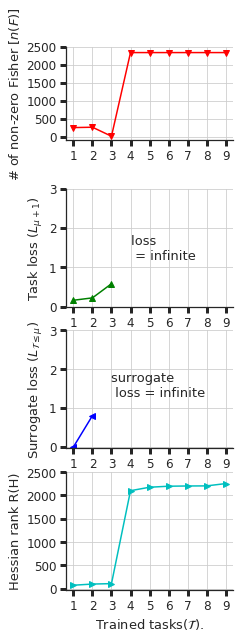

In [47]:
import pdb
figure(figsize=(3, 10))
axs = [subplot(5,1,1)]#, None, None]
for i in range(1, 4):
    axs.append(subplot(4, 1, i+1, sharex=axs[0]))
fontsize = 13

colorVal = ['r','g','b','c','m','k','y']
marker=["v","^","<",">","*","s"]

plots = [non_zero_imp_param,loss_after_task,surrogate_loss_after_task,Rank_Hessian_matrix]
ylabel = ['# of non-zero Fisher $[n(F)]$', 'Task loss ($L_{\mu+1}$)', 'Surrogate loss ($L_{\mathcal{T} \leq \mu}$)','Hessian rank R(H)']
ytick = [[0, 500, 1000, 1500, 2000, 2500], [0, 1, 2, 3], [0, 1, 2, 3], [0, 500, 1000, 1500, 2000, 2500]]
title = ['Number of non-zero importance.', 'Loss', 'Surrogate loss', 'Hessian rank R(H)']
for i in range(4):
    axs[i].plot(range(1,n_tasks+1), plots[i], marker=marker[i], c=colorVal[i])
    axs[i].set_ylabel(ylabel[i],fontsize=fontsize)
    axs[i].set_yticks(ytick[i])
    axs[i].tick_params(labelsize='large', width=3)
    axs[i].grid()
axs[-1].set_xticks(range(1,n_tasks+1))
axs[-1].set_xlabel("Trained tasks($\mathcal{T}$).",fontsize=fontsize)
axs[1].text(4, 1.2, 'loss \n = infinite', fontsize=fontsize)
axs[2].text(3, 1.3, 'surrogate \n loss = infinite', fontsize=fontsize)
plt.tight_layout()
sns.despine()
plt.savefig('AWID_EWC_evalcongestion.pdf',bbox_inches = "tight")

--------------Euclidean distance--------------------
Between task 0 and 1 : 0.3639833923680636
Between task 1 and 2 : 173181784230024.7
Between task 2 and 3 : 9.039193308387877e+29
Between task 3 and 4 : nan
Between task 4 and 5 : nan
Between task 5 and 6 : nan
Between task 6 and 7 : nan
Between task 7 and 8 : nan
--------------Cosine distance--------------------
Between task 0 and 1 : 0.996
Between task 1 and 2 : -0.024
Between task 2 and 3 : nan
Between task 3 and 4 : nan
Between task 4 and 5 : nan
Between task 5 and 6 : nan
Between task 6 and 7 : nan
Between task 7 and 8 : nan
--------------Jaccard similarity--------------------
Between task 0 and 1 : 0.858682634730539
Between task 1 and 2 : 0.839825119236884
Between task 2 and 3 : 0.8645108473188703


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  """
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in float_scalars
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in float_scalars
  if __name__ == '__main__':
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars


Between task 3 and 4 : 0.0
Between task 4 and 5 : 0.0
Between task 5 and 6 : 0.0
Between task 6 and 7 : 0.0
Between task 7 and 8 : 0.0
--------------Sequence Matcher--------------------
Between task 0 and 1 : 0.9242618741976893
Between task 1 and 2 : 0.9080017115960634
Between task 2 and 3 : 0.9071459135643988
Between task 3 and 4 : 0.0
Between task 4 and 5 : 0.0
Between task 5 and 6 : 0.0
Between task 6 and 7 : 0.0
Between task 7 and 8 : 0.0


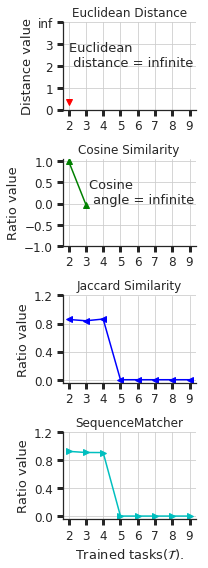

In [50]:
#Heuristic metric: Weights Pattern after training each task
from math import*
#1. Euclidean distance
def euclidean_distance(x,y):
    return sqrt(sum(pow(a-b,2) for a, b in zip(x, y)))

#2. Cosine Similarity
def square_rooted(x):
    return round(sqrt(sum([a*a for a in x])),3)
def cosine_similarity(x,y):
    numerator = sum(a*b for a,b in zip(x,y))
    denominator = square_rooted(x)*square_rooted(y)
    return round(numerator/float(denominator),3)

#3. Jaccard similarity
def jaccard_similarity(x,y):
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)

#4. Using SequenceMatcher    
from difflib import SequenceMatcher

Flatten_weights=[]
#Flattening the weights into a list
def flatten(x):
    try:
        it = iter(x)
    except TypeError:
        yield x
    else:
        for i in it:
            for j in flatten(i):
                yield j
model_weights_save = Params                
print("--------------Euclidean distance--------------------")
Eu_distance = []
for i in range(1,n_tasks):
    eu_dist = euclidean_distance(list(flatten(model_weights_save[i-1][-1210940:])),list(flatten(model_weights_save[i][-1210940:])))
    Eu_distance.append(eu_dist)
    print("Between task {0} and {1} : {2}".format(i-1,i,eu_dist))

print("--------------Cosine distance--------------------")
Cos_distance = []
for i in range(1,n_tasks):
    cos_dist = cosine_similarity(list(flatten(model_weights_save[i-1][-1210940:])),list(flatten(model_weights_save[i][-1210940:])))
    Cos_distance.append(cos_dist)
    print("Between task {0} and {1} : {2}".format(i-1,i,cos_dist))
    
    
print("--------------Jaccard similarity--------------------")
Jac_distance = []
for i in range(1,n_tasks):
    jac_dist = jaccard_similarity(list(flatten(model_weights_save[i-1][-1210940:])),list(flatten(model_weights_save[i][-1210940:])))
    Jac_distance.append(jac_dist)
    print("Between task {0} and {1} : {2}".format(i-1,i,jac_dist))

print("--------------Sequence Matcher--------------------")
Seq_matcher = []
for i in range(1,n_tasks):
    seq_matcher = SequenceMatcher(None,list(flatten(model_weights_save[i-1][-1210940:])),list(flatten(model_weights_save[i][-1210940:]))).ratio()
    Seq_matcher.append(seq_matcher)
    print("Between task {0} and {1} : {2}".format(i-1,i,seq_matcher))
    


import pdb
from matplotlib.pyplot import *
import seaborn as sns
figure(figsize=(3, 8))
subplots_adjust(hspace=0.25,
                    wspace=0.35)
axs = [plt.subplot(4,1,1)]#, None, None]
for i in range(1, 4):
    axs.append(subplot(4, 1, i+1, sharex=axs[0]))
fontsize = 13

colorVal = ['r','g','b','c','m','k','y']
marker=["v","^","<",">","*","s"]

Eu_distance[1] = np.nan; Eu_distance[2] = np.nan; Eu_distance[3] = np.nan; Eu_distance[4] = np.nan
plots = [Eu_distance,Cos_distance,Jac_distance,Seq_matcher]
ylabel = ['Distance value', 'Ratio value', 'Ratio value','Ratio value']
ytick = [[0, 1, 2, 3, 4], [-1, -0.5, 0, 0.5, 1],[0, 0.4, 0.8, 1.2], [0, 0.4, 0.8, 1.2]]
title = ['Euclidean Distance', 'Cosine Similarity', 'Jaccard Similarity', 'SequenceMatcher']
for i in range(4):
    axs[i].plot(range(2,n_tasks+1), plots[i], marker=marker[i], c=colorVal[i])
    axs[i].set_ylabel(ylabel[i],fontsize=fontsize)
    axs[i].set_yticks(ytick[i])
    axs[i].tick_params(labelsize='large', width=3)
    axs[i].grid()
    axs[i].set_title(title[i])
axs[0].set_yticklabels([0, 1, 2, 3, 'inf'])
axs[0].text(2, 2, 'Euclidean \n distance = infinite', fontsize=fontsize)
axs[1].text(3.2, 0, 'Cosine \n angle = infinite', fontsize=fontsize)
axs[-1].set_xticks(range(2,n_tasks+1))
axs[-1].set_xlabel("Trained tasks($\mathcal{T}$).",fontsize=fontsize)
plt.tight_layout()
sns.despine()
plt.savefig('AWID_EWC_Similaritymetric.pdf',bbox_inches = "tight")

In [13]:
#Heuristic metric: Weights Pattern between task 0 and last task 
from math import*
#1. Euclidean distance
def euclidean_distance(x,y):
    return sqrt(sum(pow(a-b,2) for a, b in zip(x, y)))

#2. Cosine Similarity
def square_rooted(x):
    return round(sqrt(sum([a*a for a in x])),3)
def cosine_similarity(x,y):
    numerator = sum(a*b for a,b in zip(x,y))
    denominator = square_rooted(x)*square_rooted(y)
    return round(numerator/float(denominator),3)

#3. Jaccard similarity
def jaccard_similarity(x,y):
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)

#4. Using SequenceMatcher    
from difflib import SequenceMatcher

Flatten_weights=[]
#Flattening the weights into a list
def flatten(x):
    try:
        it = iter(x)
    except TypeError:
        yield x
    else:
        for i in it:
            for j in flatten(i):
                yield j
model_weights_save = Params    
n_tasks = len(model_weights_save)


eu_dist = euclidean_distance(list(flatten(model_weights_save[0])),list(flatten(model_weights_save[-1])))
print("Euclidean distance between task {0} and {1} : {2}".format(0,len(model_weights_save)-1,eu_dist))

cos_dist = cosine_similarity(list(flatten(model_weights_save[0])),list(flatten(model_weights_save[-1])))
print("Cosine angle between task {0} and {1} : {2}".format(0,len(model_weights_save)-1,cos_dist))

jac_dist = jaccard_similarity(list(flatten(model_weights_save[0])),list(flatten(model_weights_save[-1])))
print("Jaccard similarity between task {0} and {1} : {2}".format(0,len(model_weights_save)-1,jac_dist))

seq_matcher = SequenceMatcher(None,list(flatten(model_weights_save[0])),list(flatten(model_weights_save[-1]))).ratio()
print("Sequence angle between task {0} and {1} : {2}".format(0,len(model_weights_save)-1,seq_matcher))

Euclidean distance between task 0 and 8 : nan
Cosine angle between task 0 and 8 : nan
Jaccard similarity between task 0 and 8 : 0.0
Sequence angle between task 0 and 8 : 0.0
